In [1]:
from google.colab import files

uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


Fraud data with DecionTree and RandamForest  assignment

Import the Data,
Did basic eda,
Prepared a perfect lineup for the model,
Remove the a column,
Creat a new column on the basis of one  column by if formula

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.shape

(600, 6)

In [5]:
df.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
#adding a new  column in the data set
df["income"]="test"
df.loc[df["Taxable.Income"]>30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"
df.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


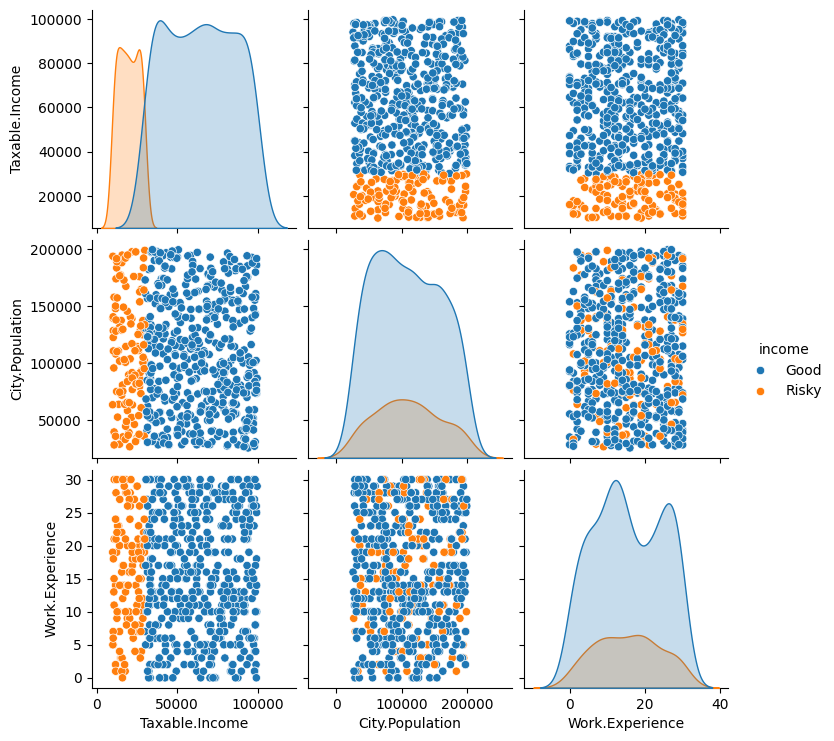

In [8]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'income')


In [9]:
#removing the column from the data as mentioned in  problem statement
df.drop(["Taxable.Income"], axis=1,inplace=True)

Good     476
Risky    124
Name: income, dtype: int64

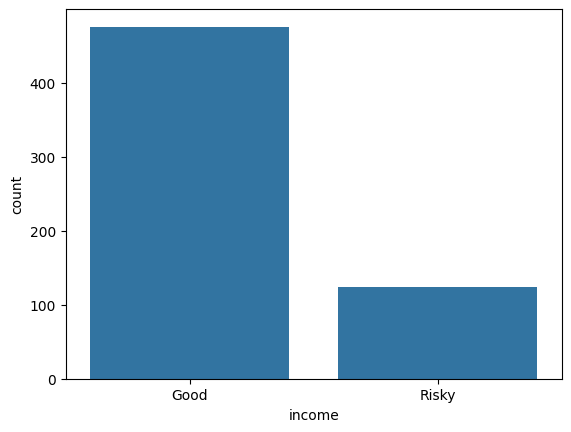

In [10]:
#checking the bargraph before encoding
sns.countplot(x="income",data=df)
plt.xlabel("income")
plt.ylabel('count')
plt.show
df["income"].value_counts()

In [11]:
#performing data transformation  for the object veriabls

df.dtypes
#checked before transformation
from sklearn.preprocessing  import LabelEncoder
le= LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtypes==object:
        df[column_name]=le.fit_transform(df[column_name])
    else:
        pass

In [12]:
# checking after labelencode
df.dtypes

Undergrad          int64
Marital.Status     int64
City.Population    int64
Work.Experience    int64
Urban              int64
income             int64
dtype: object

0    476
1    124
Name: income, dtype: int64

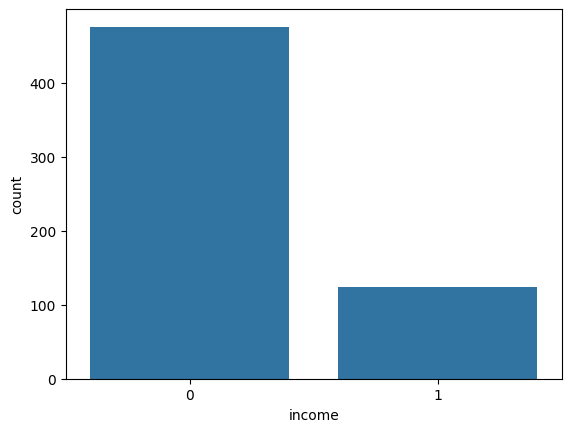

In [13]:
#checking the bargraph after encoding
sns.countplot(x="income",data=df)
plt.xlabel("income")
plt.ylabel('count')
plt.show
df["income"].value_counts()

In [14]:
#splinting the data  in X and Y
X= df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
dtypes: int64(5)
memory usage: 23.6 KB


In [16]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: income
Non-Null Count  Dtype
--------------  -----
600 non-null    int64
dtypes: int64(1)
memory usage: 4.8 KB


In [17]:
#spliting the data in train nand test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(420, 5)
(180, 5)
(420,)
(180,)


Decision Tree Classifier


In [18]:
#fitiing a model with decision tree

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("training accuracy:",accuracy_score(Y_train,Y_pred_train))
print("test accuracy:",accuracy_score(Y_test,Y_pred_test))

training accuracy: 1.0
test accuracy: 0.7


In [19]:
#trying to show the depth and nodes of the above tree

max_depth=clf.tree_.max_depth
print("Maxdepth of the tree", max_depth)

n_nodes = clf.tree_.node_count
print("Number of nodes in the tree:", n_nodes)

Maxdepth of the tree 23
Number of nodes in the tree: 247


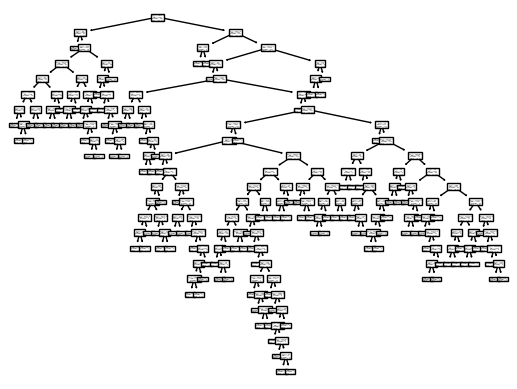

In [20]:
#tree view

from sklearn import tree
#PLot the decision tree
tree.plot_tree(clf);

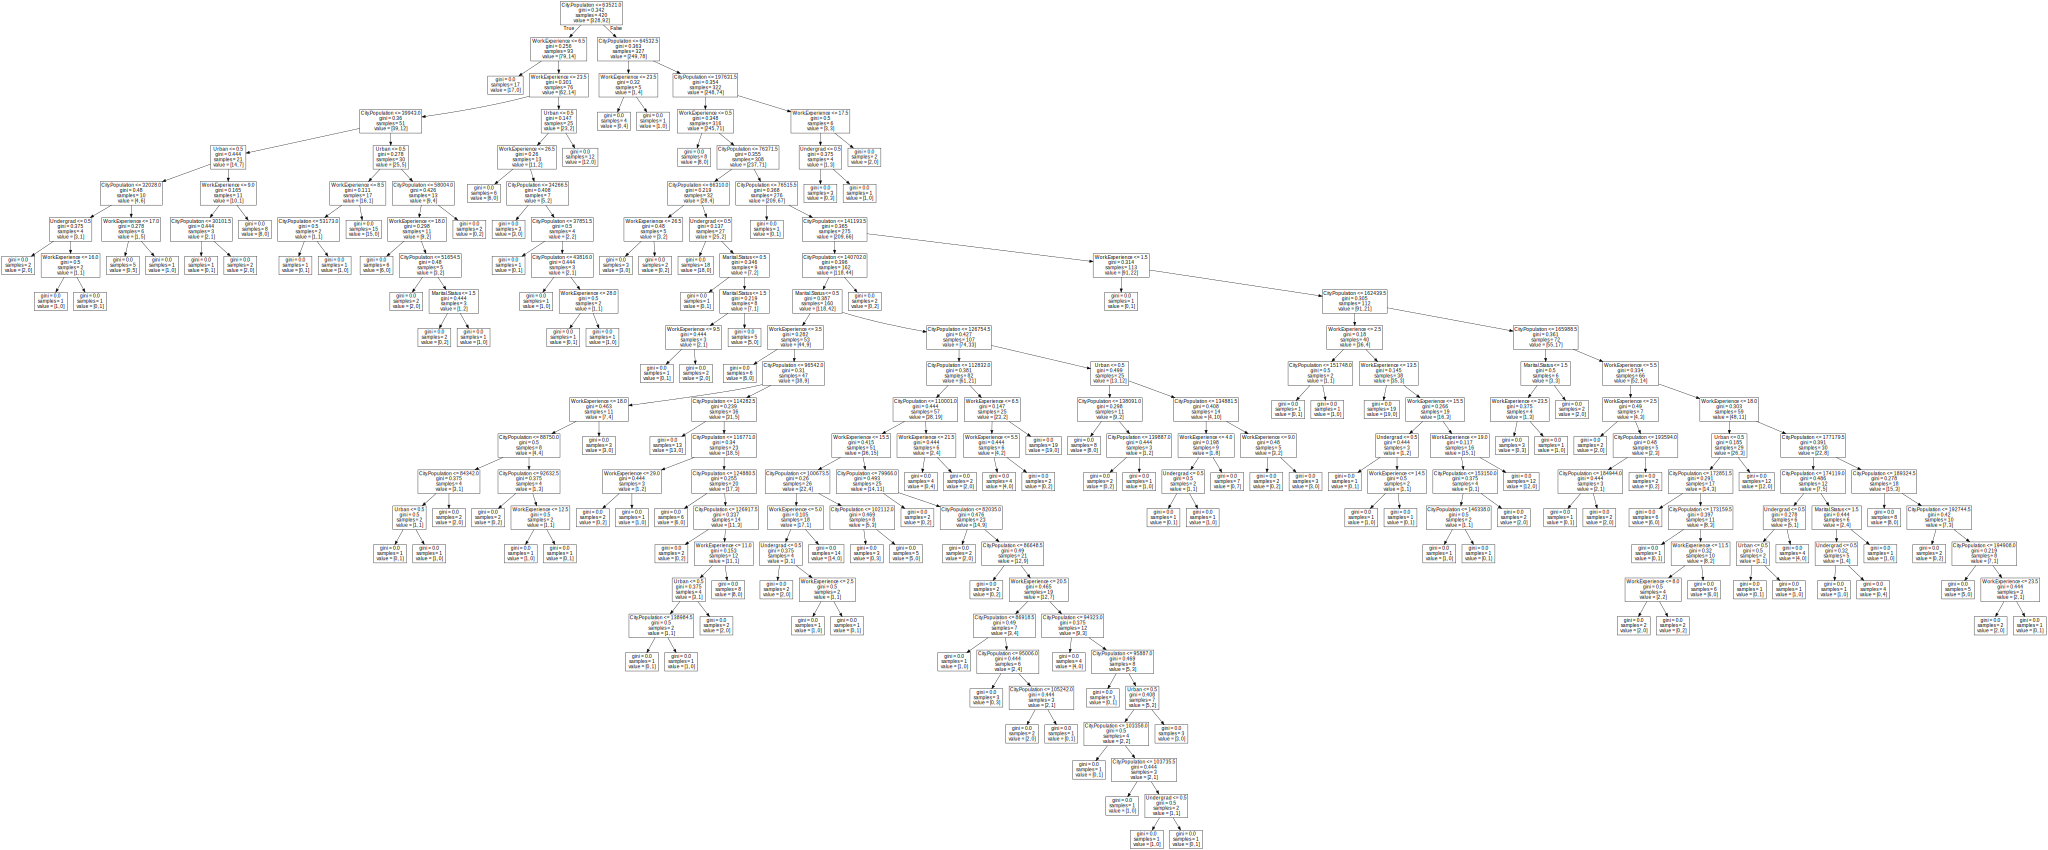

In [21]:
#showing by the graph
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=X.columns)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [22]:
# cross validation code
training_accuracies = []
test_accuracies = []

In [24]:
#1st try with maxdepth
from sklearn.metrics import accuracy_score
for i in range(1,101):
    clf = DecisionTreeClassifier(max_depth=20)
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    clf.fit(X_train,Y_train)
    Y_pred_train  = clf.predict(X_train)
    Y_pred_test   = clf.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  0.91
Cross validation Test Accuracy:  0.7


In [29]:
#2nd try with different maxdepth
from sklearn.metrics import accuracy_score
for i in range(1,101):
    clf = DecisionTreeClassifier(max_depth=15)
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    clf.fit(X_train,Y_train)
    Y_pred_train  = clf.predict(X_train)
    Y_pred_test   = clf.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  0.98
Cross validation Test Accuracy:  0.71


In [26]:
#showing the results with bagging  to tunning the model
#bagging classifier
from sklearn.ensemble import BaggingClassifier
bagging_clf=BaggingClassifier(estimator=DecisionTreeClassifier(),max_samples=.7,n_estimators=100,max_features=.7)
bagging_clf.fit(X_train, Y_train)
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)

print("Bagging Training accuracy:", accuracy_score(Y_train, y_pred_train))
print("Bagging Testing accuracy:", accuracy_score(Y_test, y_pred_test))


# bagging classifier with cross validation
training_accuracies = []
test_accuracies = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.6, n_estimators=100, max_features=0.6)
    bagging_clf.fit(X_train, Y_train)
    y_pred_train = bagging_clf.predict(X_train)
    y_pred_test = bagging_clf.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,y_pred_test))

print("Bagging - Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Bagging - Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))


Bagging Training accuracy: 0.9047619047619048
Bagging Testing accuracy: 0.7944444444444444
Bagging - Cross validation Training Accuracy:  0.88
Bagging - Cross validation Test Accuracy:  0.78


showing the results with randam forest  to tunning the model
#RandamForest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFC_clf= RandomForestClassifier(max_samples=.6,max_features=.75,n_estimators=100)
RFC_clf.fit(X_train,Y_train)
y_pred_train=RFC_clf.predict(X_train)
y_pred_test=RFC_clf.predict(X_test)


print("RFC training accuracy:",accuracy_score(Y_train,y_pred_train))
print("RFC Testing accuracy:", accuracy_score(Y_test, y_pred_test))

#Randam Forest with cross validation


training_accuracies=[]
test_accuracies=[]

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    RFC_clf=RandomForestClassifier(n_estimators=100,max_features=.7,max_samples=.7)
    RFC_clf.fit(X_train, Y_train)
    y_pred_train = RFC_clf.predict(X_train)
    y_pred_test = RFC_clf.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,y_pred_test))

print("RFC_clf - Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("RFC_clf - Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))


RFC training accuracy: 0.9380952380952381
RFC Testing accuracy: 0.7833333333333333
RFC_clf - Cross validation Training Accuracy:  0.98
RFC_clf - Cross validation Test Accuracy:  0.76


In [28]:
#confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_test)
cm

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score:", accuracy_score(Y_test,Y_pred_test).round(2))
print("Sensitivity score:", recall_score(Y_test,Y_pred_test).round(2))
print("Precision score:", precision_score(Y_test,Y_pred_test).round(2))
print("F1 score:", f1_score(Y_test,Y_pred_test).round(2))
TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(FP + TN)
print("Specificity score:", TNR.round(2))

Accuracy score: 0.63
Sensitivity score: 0.08
Precision score: 0.09
F1 score: 0.08
Specificity score: 0.77
